In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


portfolio = pd.read_json("portfolio.json", orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [2]:
sns.set()

In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


1. Onehot encoding for "channels"
2. combine "reward", "duration", "difficulty" and "offer_type" together to create a new var


In [4]:
def onehot_encoding_channels(portfolio_df):
    channels = ['email', "mobile", "social", "web"]
    for channel in channels:
        portfolio_df[channel] = portfolio_df.channels.apply(lambda x: channel in x ) * 1
    portfolio_df = portfolio_df.drop("channels", axis = 1)
    
    return portfolio_df

def new_portfolio_name(portfolio_df):
    portfolio_df['name'] = portfolio_df.offer_type.astype(str) + "_" + portfolio_df.difficulty.astype(str) + "_"  + portfolio_df.reward.astype(str) + "_" + portfolio_df.duration.astype(str)
    return portfolio_df

def preprocessing_portfolio(portfolio_df):
    portfolio_df = onehot_encoding_channels(portfolio_df)
    portfolio_df = new_portfolio_name(portfolio_df)
    return portfolio_df


In [5]:
portfolio_clean = preprocessing_portfolio(portfolio)

In [6]:
portfolio_clean

,reward,difficulty,duration,offer_type,id,email,mobile,social,web,name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,bogo_10_10_7
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo_10_10_5
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,informational_0_0_4
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,bogo_5_5_7
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,discount_20_5_10
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount_7_3_7
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount_10_2_10
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,informational_0_0_3
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo_5_5_5
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,discount_10_2_7


In [7]:
portfolio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
reward        10 non-null int64
difficulty    10 non-null int64
duration      10 non-null int64
offer_type    10 non-null object
id            10 non-null object
email         10 non-null int32
mobile        10 non-null int32
social        10 non-null int32
web           10 non-null int32
name          10 non-null object
dtypes: int32(4), int64(3), object(3)
memory usage: 768.0+ bytes


Well, there are 10 offers for portfolio

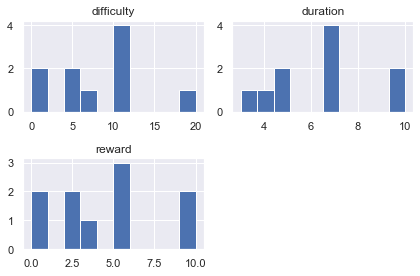

In [8]:
portfolio_clean[['reward', 'difficulty','duration']].hist()
plt.tight_layout()

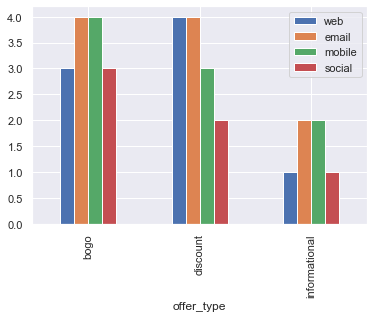

In [9]:
channels = ['web', 'email', 'mobile', 'social']
portfolio_clean.groupby('offer_type').sum()[channels].plot(kind = 'bar')

## Profile

In [10]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [11]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null int64
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [12]:
profile[['age', 'income']].describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


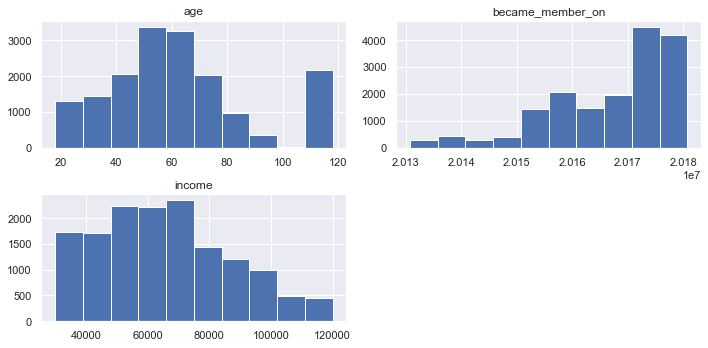

In [13]:
profile[['age','income', 'became_member_on']].hist(figsize = (10,5))
plt.tight_layout()

In [14]:
profile[profile['age'] == 118]['age'].value_counts()

118    2175
Name: age, dtype: int64

In [15]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

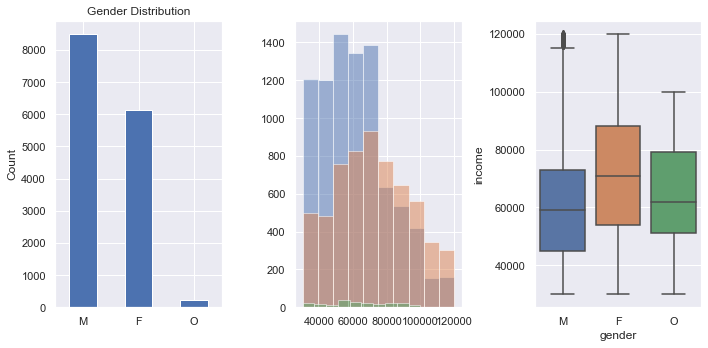

In [16]:
""" GENDER """

f, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize = (10,5))

profile.gender.value_counts().plot(kind = 'bar', ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)
ax1.set_title("Gender Distribution")
ax1.set_ylabel("Count")


ax2.hist(profile[profile.gender == 'M']['income'], alpha = 0.5, label = 'M')
ax2.hist(profile[profile.gender == 'F']['income'], alpha = 0.5, label = 'F')
ax2.hist(profile[profile.gender == 'O']['income'], alpha = 0.5, label = 'O')

sns.boxplot("gender", "income",data = profile, order = ['M', 'F', 'O'] ,ax = ax3)

plt.tight_layout()


In [17]:
profile.groupby('gender').describe()['income']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6129.0,71306.412139,22338.353773,30000.0,54000.0,71000.0,88000.0,120000.0
M,8484.0,61194.601603,20069.517615,30000.0,45000.0,59000.0,73000.0,120000.0
O,212.0,63287.735849,18938.594726,30000.0,51000.0,62000.0,79250.0,100000.0


### Datetime

In [18]:
def profile_parse_dates(profile):
    profile_df = profile.copy()
    
    profile_df['became_member_on'] = profile_df.became_member_on.apply( lambda x: str(x))
    profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'])
    
    return profile_df

profile_clean = profile_parse_dates(profile)

In [19]:
profile_clean.became_member_on

0       2017-02-12
1       2017-07-15
2       2018-07-12
3       2017-05-09
4       2017-08-04
           ...    
16995   2018-06-04
16996   2018-07-13
16997   2017-01-26
16998   2016-03-07
16999   2017-07-22
Name: became_member_on, Length: 17000, dtype: datetime64[ns]

Text(0.5, 1.0, 'Distribution of became_member_on')

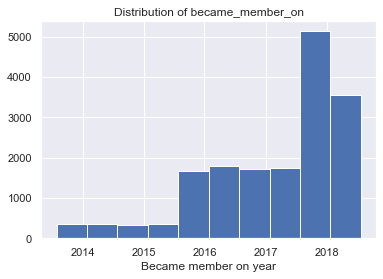

In [20]:
profile_clean.became_member_on.hist()
plt.xlabel("Became member on year")
plt.title("Distribution of became_member_on")

## Missing data

In [21]:
profile_clean.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Text(0.5, 1.0, 'Profiles with missing values')

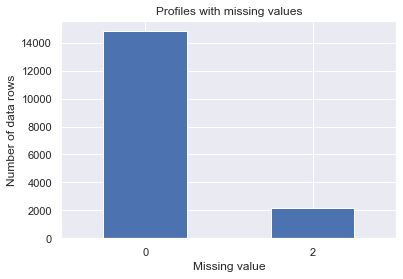

In [22]:
row_null = profile_clean.isnull().sum(axis = 1)
row_null.value_counts().plot(kind = 'bar')
plt.xlabel("Missing value")
plt.xticks(rotation = 0)
plt.ylabel("Number of data rows")
plt.title("Profiles with missing values")

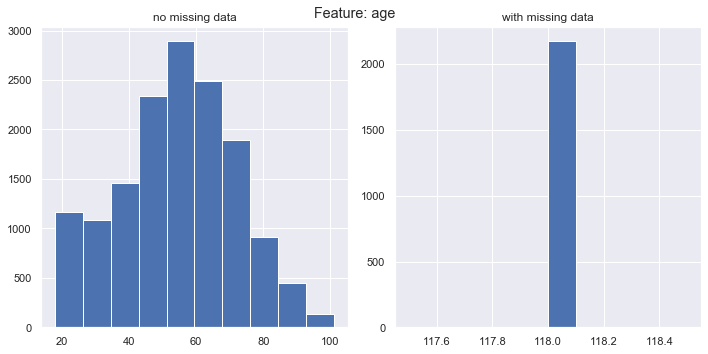

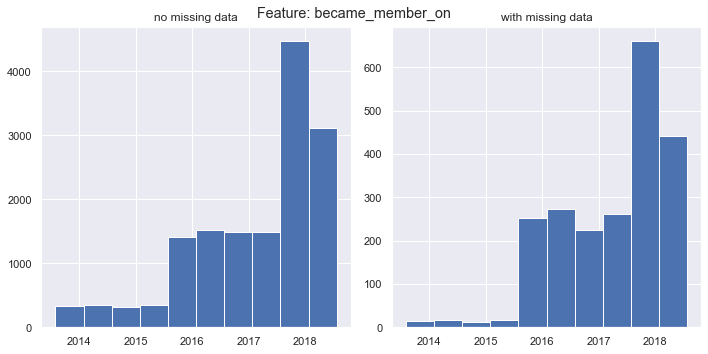

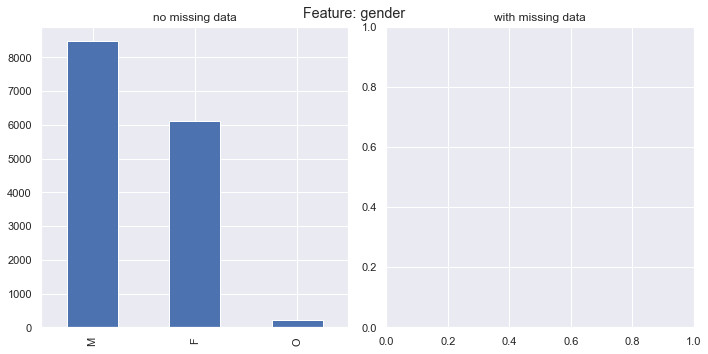

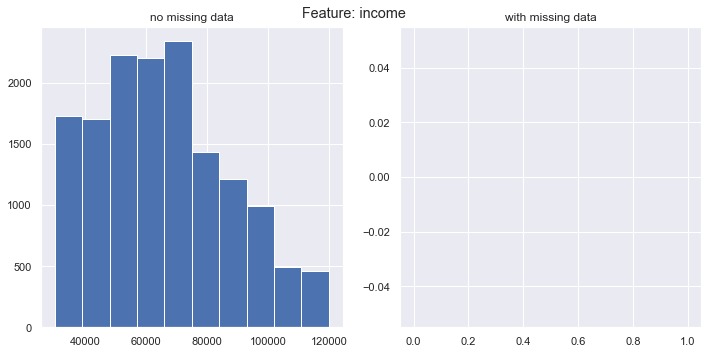

In [23]:
"""Compare data with missing values with no missing values"""
profile_null = profile_clean[row_null == 0]
profile_not = profile_clean[row_null > 0]


for col in ['age', 'became_member_on', 'gender', "income"]:
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    
    if col == 'gender':
        profile_null[col].value_counts().plot(kind = 'bar',ax = ax1)
        try:
            profile_not[col].value_counts().plot(kind = 'bar', ax = ax2)
        except:
            pass
        
    else:
        profile_null[col].hist(ax= ax1)
        profile_not[col].hist(ax = ax2)
    
    ax1.set_title("no missing data")
    ax2.set_title("with missing data")
    f.suptitle("Feature: " + col)
    f.tight_layout()




Summary:
    1. there're 2175 missing data in the total 170000 profile.
    2. The age with 118 is the abnormalities data and they're related to the missing data in income and gender data. Probably they don't want to share info with us. We will investigate them in the future.
    3. Most of customers are male, while the average income of females ($71306) are higher than males($61194) 

## Transcript

In [24]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [25]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
person    306534 non-null object
event     306534 non-null object
value     306534 non-null object
time      306534 non-null int64
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [26]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [27]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [28]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [29]:
transcript.person.nunique()

17000

all the people in profile are also avaible in transcript

In [ ]:
#asd